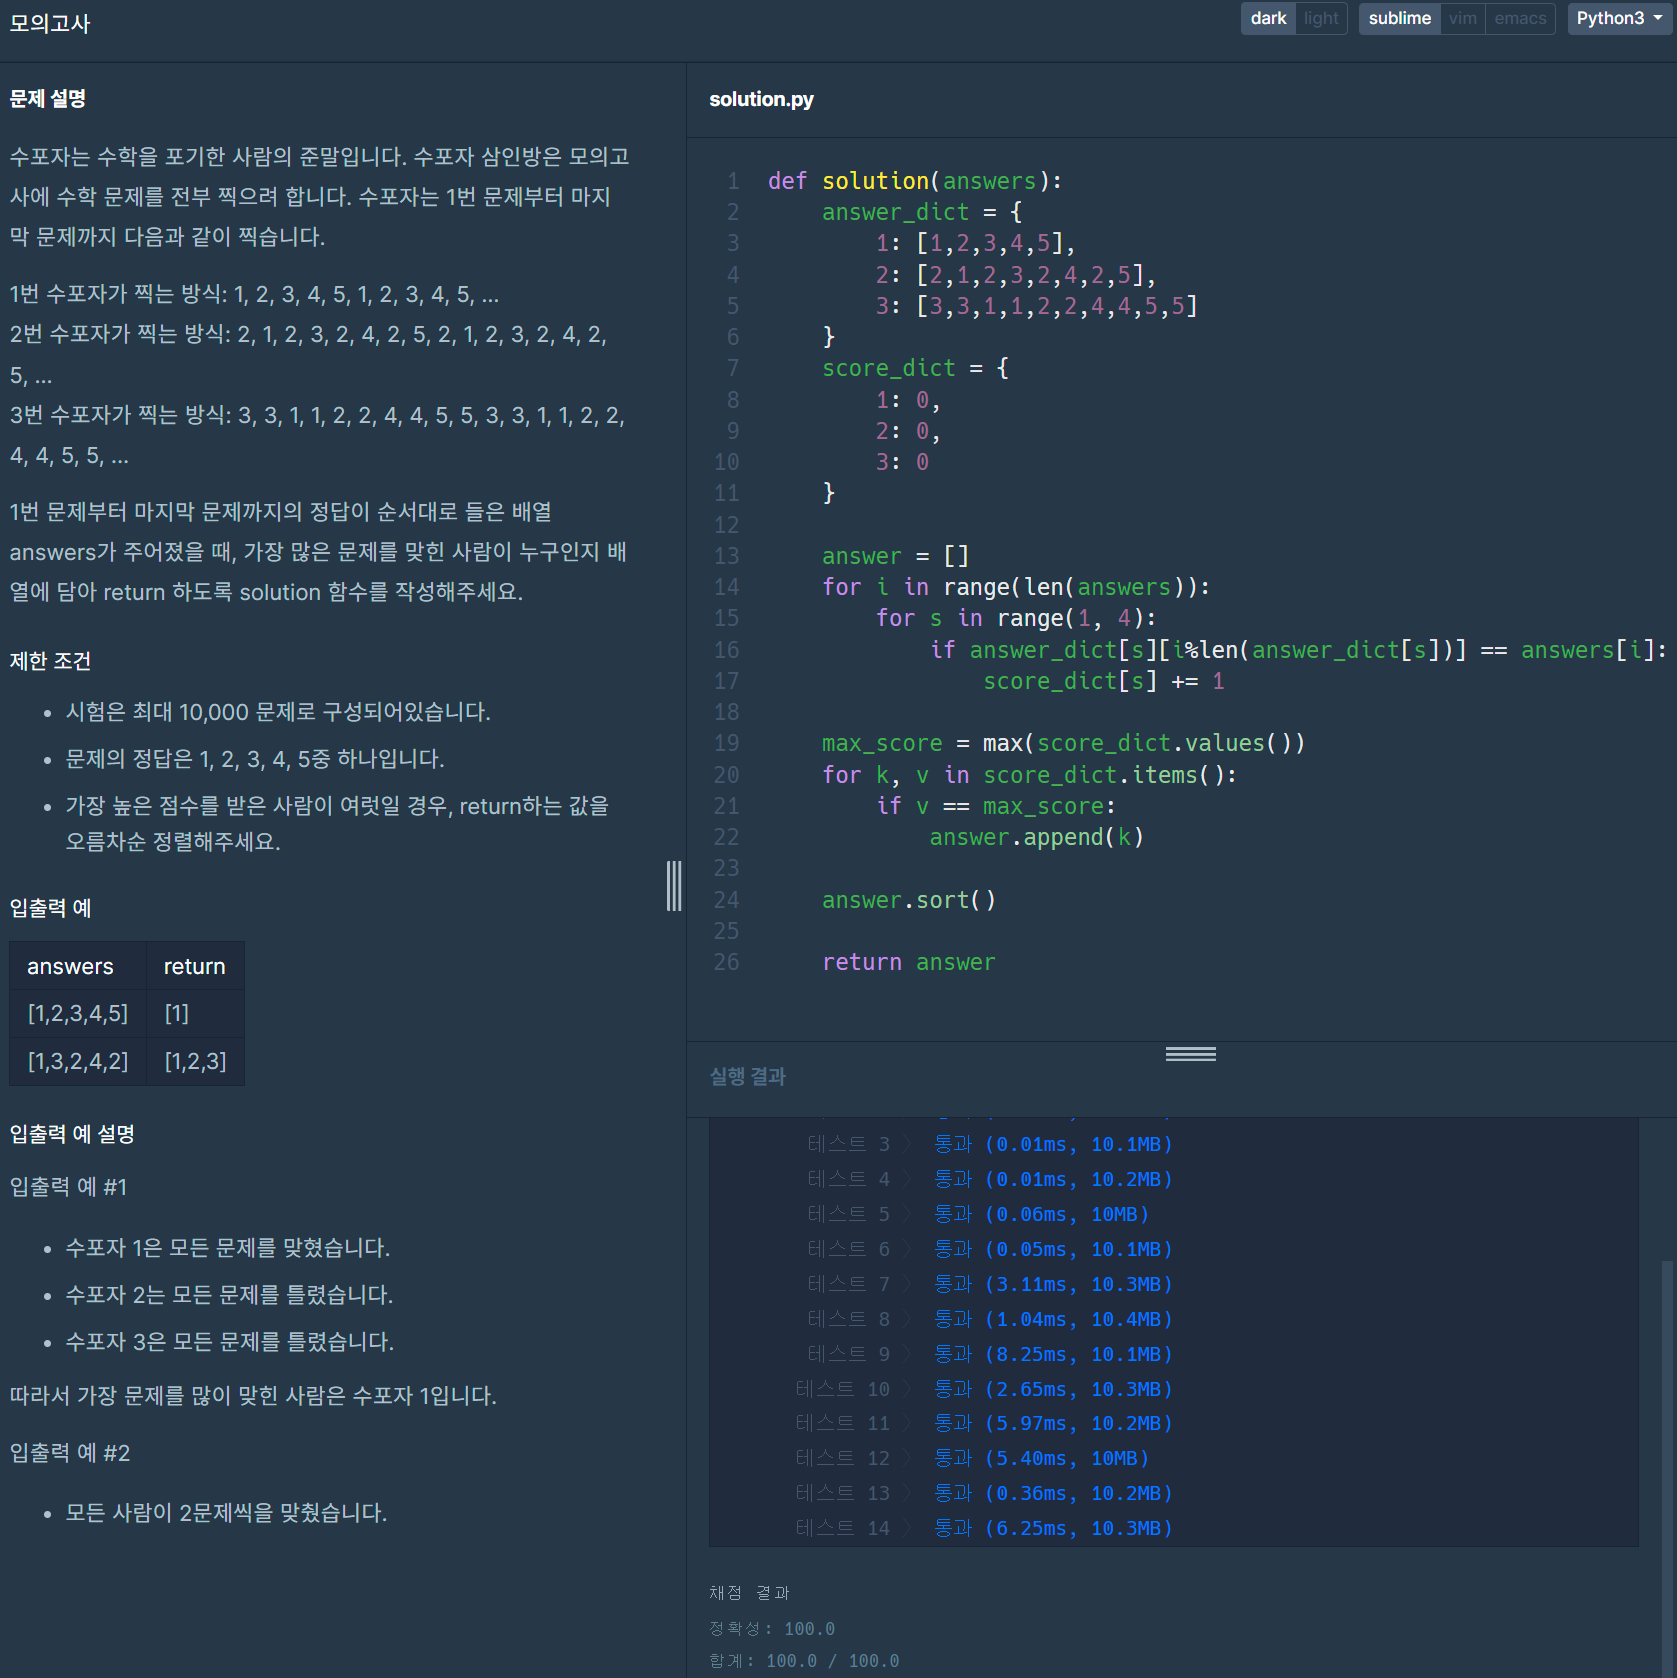

In [ ]:
def solution(answers):
    # 각 학생의 답변 패턴을 리스트로 만들어서 딕셔너리에 저장
    # 각 학생의 점수를 저장할 딕셔너리 생성
    # 각 학생번호로 패턴과 점수를 호출할 수 있음
    answer_dict = {
        1: [1,2,3,4,5],
        2: [2,1,2,3,2,4,2,5],
        3: [3,3,1,1,2,2,4,4,5,5]
    }   
    score_dict = {
        1: 0,
        2: 0,
        3: 0
    }
    
    answer = []
    
    # 각 학생의 답변 패턴과 정답을 비교하여 점수를 매김
    for i in range(len(answers)):
        for s in range(1, 4):
            # 전체 문제의 길이에서 학생의 답변 패턴의 길이로 나눈 나머지를 이용하여
            # 학생의 답변 패턴을 반복하여 비교
            if answer_dict[s][i%len(answer_dict[s])] == answers[i]:
                score_dict[s] += 1
    
    # 높은 점수를 찾고, 동점자가 있으면 학생번호를 리스트로 저장
    max_score = max(score_dict.values())
    for k, v in score_dict.items():
        if v == max_score:
            answer.append(k)
    
    # 높은 점수의 학생번호를 오름차순으로 정렬
    answer.sort()
    
    return answer

# 성공
- 딕셔너리를 이용해 각 학생의 답안지와 점수 정리
- i%답안지의 길이 를 통해 답안지 반복
- 최대점수 확인후, 최대점수인 학생을 모두 리스트에 추가
- 리스트 정렬

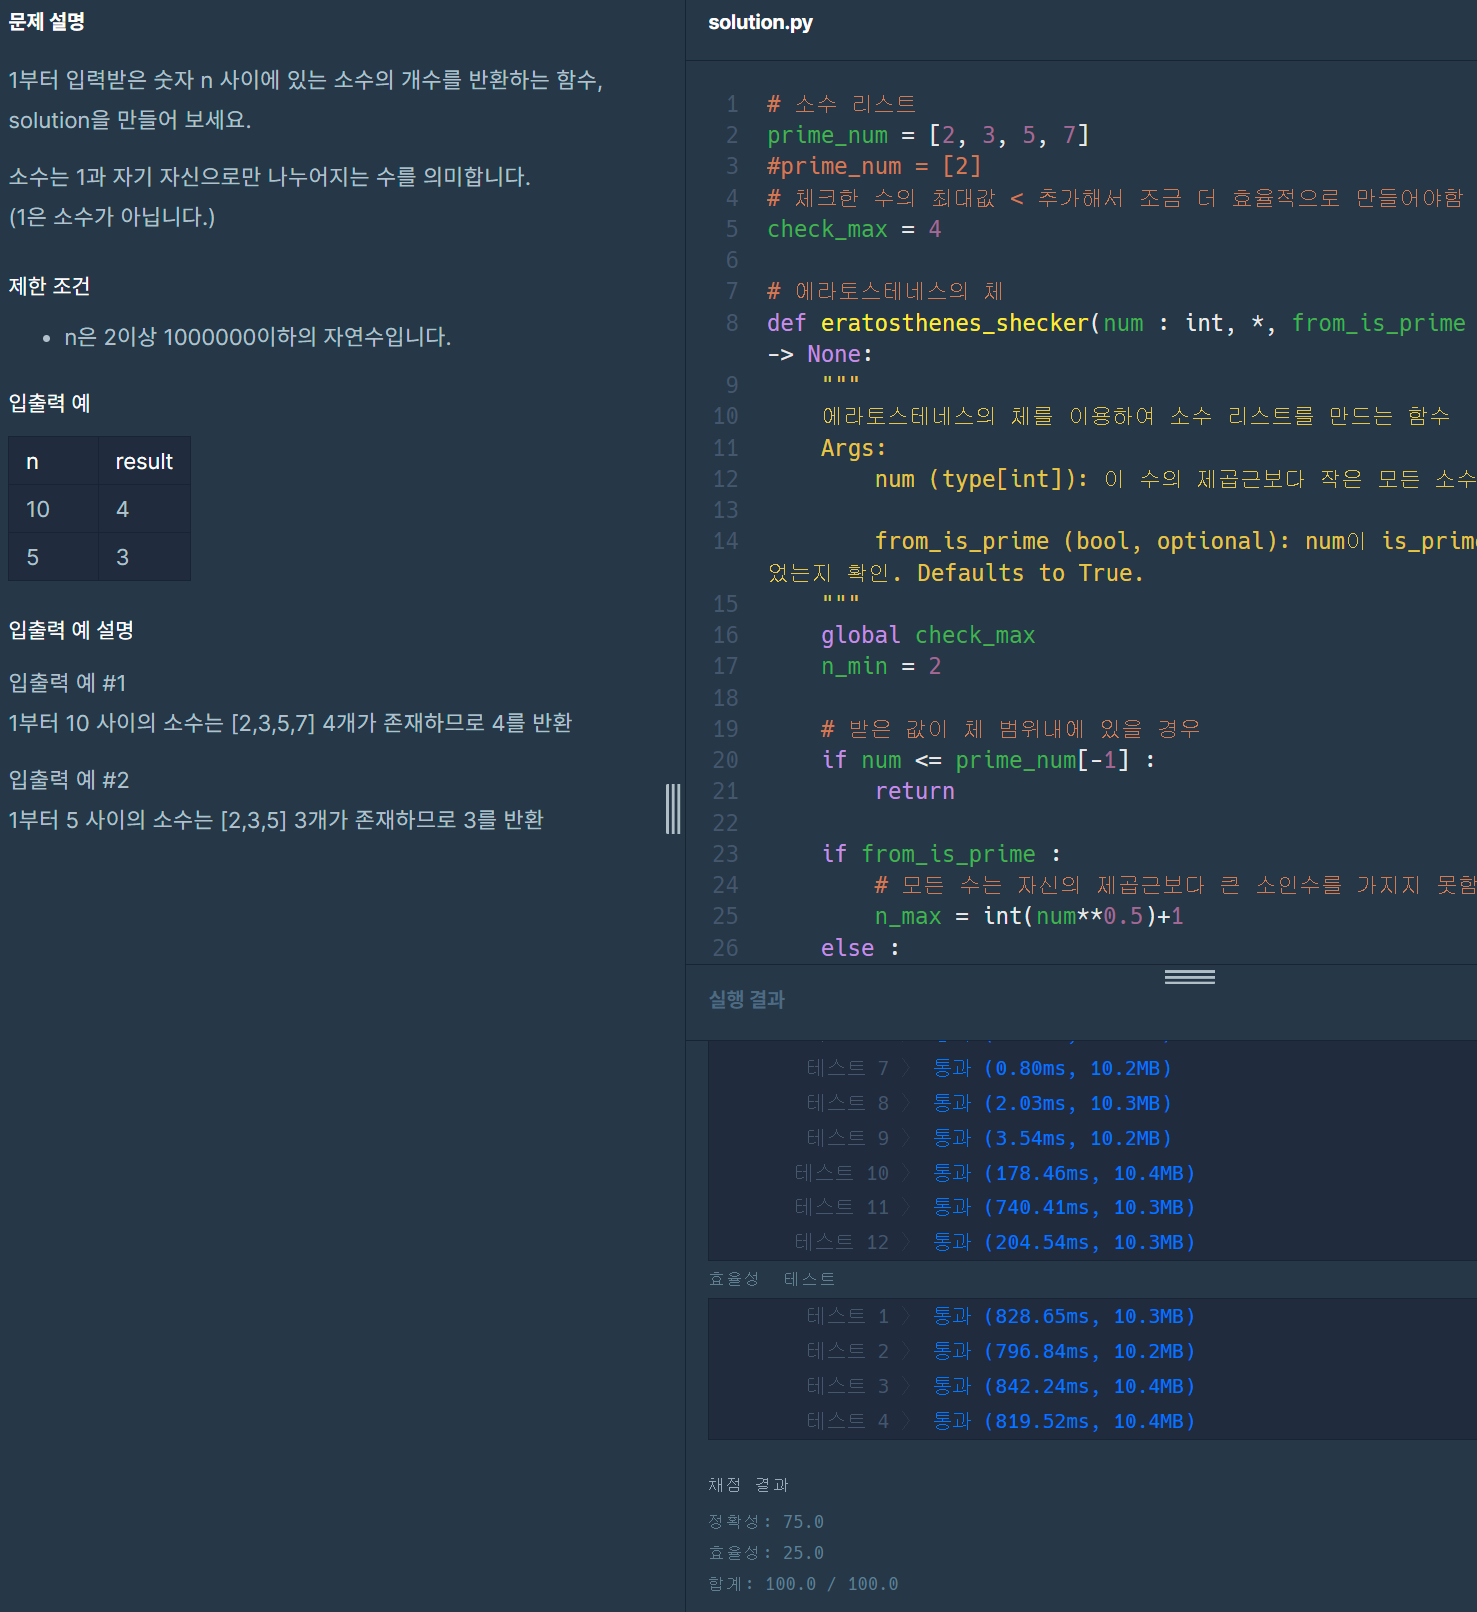

In [ ]:
# 소수 리스트
prime_num = [2, 3, 5, 7]
#prime_num = [2]
# 체크한 수의 최대값 < 추가해서 조금 더 효율적으로 만들어야함
check_max = 4

# 에라토스테네스의 체
def eratosthenes_shecker(num : int, *, from_is_prime : bool = True) -> None:
    """
    에라토스테네스의 체를 이용하여 소수 리스트를 만드는 함수
    Args:
        num (type[int]): 이 수의 제곱근보다 작은 모든 소수를 구함
        
        from_is_prime (bool, optional): num이 is_prime 함수에서 호출되었는지 확인. Defaults to True.
    """
    global check_max
    n_min = 2
    
    # 받은 값이 체 범위내에 있을 경우
    if num <= prime_num[-1] :
        return
    
    if from_is_prime :
        # 모든 수는 자신의 제곱근보다 큰 소인수를 가지지 못함
        n_max = int(num**0.5)+1
    else :
        # 어떤 수 보다 작은 소수를 구해두는 경우
        n_max = num + 1

    
    if num > check_max :
        # 소수 리스트에 이후 숫자들을 추가
        ex_l = list(range(prime_num[-1]+1,n_max))
        ex_l = [v for v in ex_l if (v % 2 != 0) and (v % 3 != 0)]
        prime_num.extend(ex_l)
        check_max = num
    else :
        return
    
    # print(prime_num)
    
    # '소수판별 체' 알고리즘
    for i in prime_num:
        for j in prime_num:
            if i == j:
                continue
            if 0==(j%i):
                prime_num.remove(j)
    return

# 소수 판별
def is_prime(num : int) -> bool :
    """
    소수 판별 함수
    Args:
        num (type[int]): 소수인지 확인 할 숫자

    Returns:
        bool: 소수이면 True, 아니면 False
    """
    result = True
    
    # 소수 리스트에 있는지 먼저 확인
    if num <= prime_num[-1] :
        if num in prime_num :
            return True
        else :
            return False

    # 체크해본 수보다 num이 크면 에라토스테네스의 체를 이용하여 소수 리스트를 만듬
    if num > check_max :
        eratosthenes_shecker(num)
    
    # 소수 리스트중 나누어 떨어지는 수가 있으면 소수가 아님
    # 소수가 아닌수는 삭제되어 있으므로 다른수로 나누어보는 비효율은 없음
    for v in prime_num :
        if num % v == 0 :
            result = False
            break # <- 이걸 깜빡해서 효율성 테스트에서 실패했었음
    
    return result

def solution(n):
    answer = 0
    # n부터 2까지 소수인지 확인
    # 역순으로 확인하면서 소수를 찾으면
    # 에라토스테네스의 체를 한번만 돌려서 계속 사용할 수 있음
    for i in range(n, 1, -1):
        if is_prime(i):
            answer += 1
    return answer

# 성공
 - 소수관련 문제에 코드를 재사용 가능하도록 짠 코드
 - 에라토스테네스의 체를 이용하여 n의 제곱근 이하의 소수를 리스트에 저장
 - n의 제곱근 이하의 수만 검사하면, 소수여부 확인 가능
 - is_prime() 함수로 각 수가 소수인지의 여부 확인
## 실패원인
 - 소수들로 나눈 뒤 break를 안걸어웠었다
 - 코드 확인 제대로 할 것!

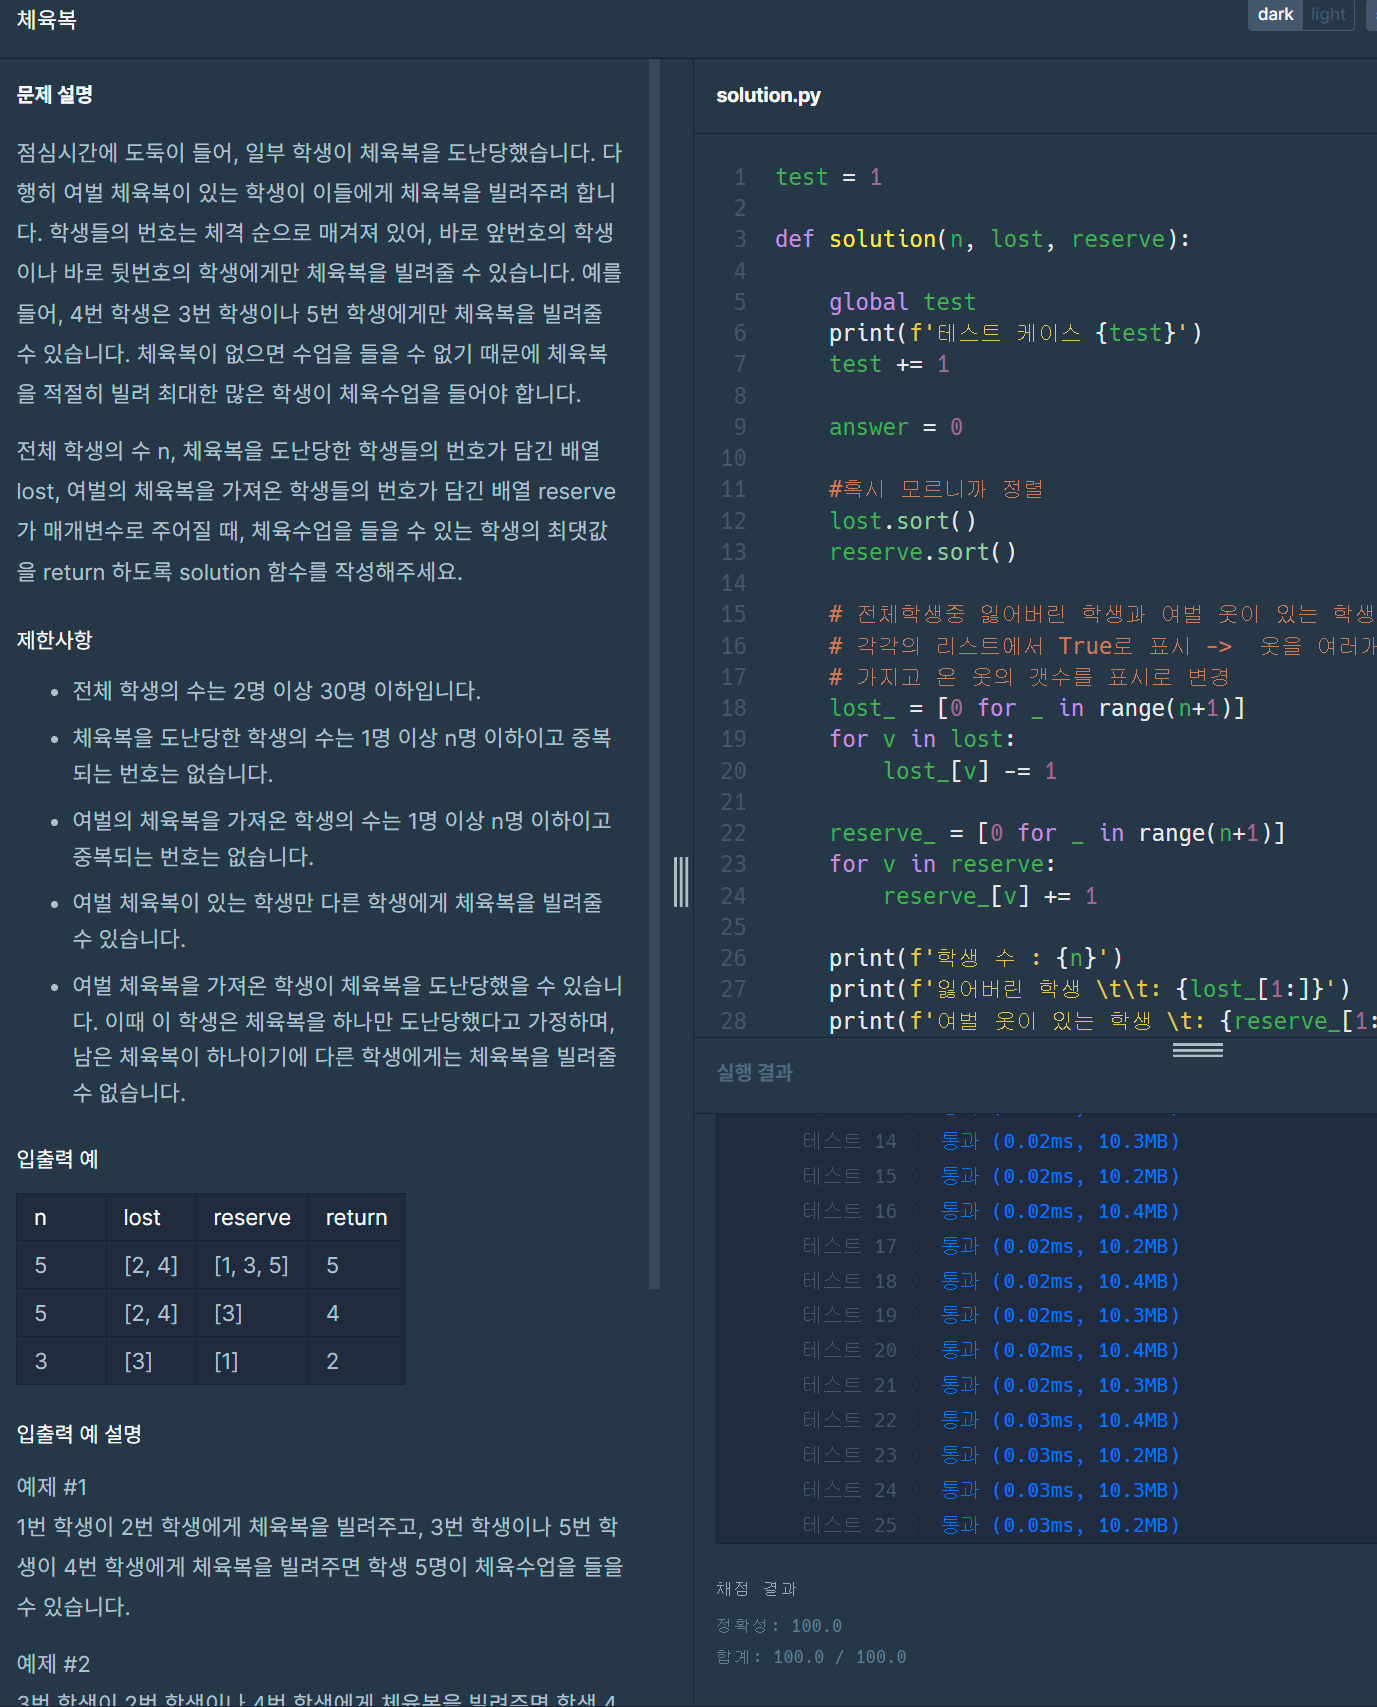

In [1]:
test = 1

def solution(n, lost, reserve):
    
    global test
    print(f'테스트 케이스 {test}')
    test += 1
    
    answer = 0
    
    #혹시 모르니까 정렬
    lost.sort()
    reserve.sort()
    
    # 전체학생중 잃어버린 학생과 여벌 옷이 있는 학생을
    # 각각의 리스트에서 True로 표시 ->  옷을 여러개 가져올 수 있을거같아
    # 가지고 온 옷의 갯수를 표시로 변경
    lost_ = [0 for _ in range(n+1)]
    for v in lost:
        lost_[v] -= 1
            
    reserve_ = [0 for _ in range(n+1)]
    for v in reserve:
        reserve_[v] += 1
            
    print(f'학생 수 : {n}')
    print(f'잃어버린 학생 \t\t: {lost_[1:]}')
    print(f'여벌 옷이 있는 학생 \t: {reserve_[1:]}')
    
    for i in range(1, n+1):
        # 잃어버린 사람 == 여벌 옷이 있는 사람
        if lost_[i] == -1 and reserve_[i] >= 1:
            lost_[i] += 1
            reserve_[i] -= 1
    
    for i in range(1, n+1):
        # 잃어버린 사람 and 여벌 옷이 있는 사람 - 1
        if lost_[i] == -1 and reserve_[i-1] >= 1:
            lost_[i] += 1
            reserve_[i-1] -= 1
        # 잃어버린 사람 and 여벌 옷이 있는 사람 + 1
        elif i < n:
            if lost_[i] == -1 and reserve_[i+1] >= 1:
                lost_[i] += 1
                reserve_[i+1] -= 1
    
    print(f'여전히 옷이 없는 학생 : {sum(lost_[1:])}')
    # 아직 옷이없는 사람 수
    # 부족한 옷은 -1로 표시되어 있으므로
    # sum(lost_)를 통해 부족한 옷의 수를 구함
    answer = n + sum(lost_)
    
    return answer

# 성공
 - lost_와 reserve_리스트를 만들어 모든 학생들의 여부를 저장

## 실패원인
 - 조건을 제대로 안읽었음
 - 잃어버린사람이 본인옷을 가져왔으면 먼저 따로 제거해줌